In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
#from google.colab import drive
from tqdm import tqdm
#drive.mount('/content/drive')


In [4]:
dfBitcoin = pd.read_csv('BCHAIN-MKPRU.csv')#pd.read_csv('/content/drive/MyDrive/MCM/BCHAIN-MKPRU.csv')
dfGold = pd.read_csv('LBMA-GOLD.csv').dropna().reset_index(drop = True)#pd.read_csv('/content/drive/MyDrive/MCM/LBMA-GOLD.csv').dropna().reset_index(drop = True)


dfBitcoin.columns = ['Date', 'Price']
dfGold.columns = dfBitcoin.columns


# Calculate Statistics

In [ ]:
def addDailyReturn(df):
  df['DailyReturn'] = (df.iloc[:,1] / df.iloc[:,1].shift(1)) - 1

def addIchimoku(df):
    maxVal = df.iloc[:,1].rolling(window = 9).max()
    minVal = df.iloc[:,1].rolling(window = 9).min()
    df['conversion'] = (maxVal + minVal)/2
    
    #Baseline
    maxVal2 = df.iloc[:,1].rolling(window = 26).max()
    minVal2 = df.iloc[:,1].rolling(window = 26).min()
    df['baseline'] = (maxVal2 + minVal2)/2
    
    #Spans
    df['spanA'] = ((df['conversion'] + df['baseline'])/2).shift(26)
    maxVal3 = df.iloc[:,1].rolling(window = 52).max()
    minVal3 = df.iloc[:,1].rolling(window = 52).min()
    df['spanB'] = ((maxVal3 + minVal3)/2).shift(26)
    df['lagging'] = df.iloc[:,1].shift(-26)
    
    return df

#plotFeature(dfGold, 2)
#plotFeature(dfBitcoin, 2)

#addIchimoku(dfGold)
def getCloudColor(label):
    if label >= 1:
        return 'rgba(0,250,0,0.4)'
    else:
        return 'rgba(250,0,0,0.4)'
    
def graphIchimoku(df):
    #df = getDfFromCsv(ticker)
    df['label'] = np.where(df['spanA'] > df['spanB'], 1, 0)
    df['groups'] = df['label'].ne(df['label'].shift()).cumsum()
    
   # candle = go.Candlestick(x = df.index, open = df.Open, high = df.High, low = df.Low, close = df.Close, name = 'Candlestick')
    df1 = df.copy()
    df = df.groupby('groups')
    
    fig = go.Figure()
    dfs = []
    for name, data in df:
        dfs.append(data)
    
    for df in dfs:
        fig.add_traces(go.Scatter(x = df.Date, y = df.spanA, line = dict(color = 'rgba(0,0,0,0)')))
        
        fig.add_traces(go.Scatter(x=df.Date, y=df.spanB,
        line=dict(color='rgba(0,0,0,0)'),
        fill='tonexty',
        fillcolor = getCloudColor(df['label'].iloc[0])))

    
    baseLine = go.Scatter(x = df1.Date, y = df1.baseline, line = dict( color = 'pink', width = 2), name = 'Baseline')
    conversion = go.Scatter(x = df1.Date, y = df1.conversion, line = dict(color = 'black', width = 2), name = 'Conversion')
    spanA = go.Scatter(x = df1.Date, y = df1.spanA, line = dict(color = 'green', width = 2, dash = 'dot'), name = 'Span A')
    spanB = go.Scatter(x = df1.Date, y = df1.spanB, line = dict(color = 'red', width = 1, dash = 'dot'), name = 'Span B')
    lagging = go.Scatter(x = df1.Date, y = df1.lagging, line = dict(color = 'purple', width = 2), name = 'Lagging')
    price = go.Scatter(x = df1.Date, y = df1.iloc[:, 1], line = dict(color = 'blue', width = 3), name = 'Closing Price' )
   # fig.add_traces(candle)
    fig.add_traces(baseLine)
    fig.add_traces(conversion)
    fig.add_traces(spanA)
    fig.add_traces(spanB)
    fig.add_traces(lagging)
    fig.add_traces(price)
    #fig.add_traces(price)
   # fig.update_layout( height = 600, width = 100, showlegend = True)
    #fig.update_layout(title_text='Your title'
    fig.show()
#graphIchimoku(dfGold)

In [ ]:
addDailyReturn(dfGold)
addDailyReturn(dfBitcoin)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          1.,   0.,   2.,   8.,   5.,   6.,  10.,  10.,  12.,  21.,  36.,
         27.,  62.,  81., 127., 225., 421., 260., 144., 102.,  75.,  54.,
         27.,  30.,  20.,   9.,  13.,   9.,   2.,   4.,   6.,   2.,   3.,
          4.,   1.,   1.,   0.,   2.]),
 array([-0.39140443, -0.38123654, -0.37106865, -0.36090077, -0.35073288,
        -0.34056499, -0.3303971 , -0.32022921, -0.31006132, -0.29989343,
        -0.28972554, -0.27955765, -0.26938976, -0.25922187, -0.24905398,
        -0.23888609, -0.2287182 , -0.21855031, -0.20838242, -0.19821453,
        -0.18804664, -0.17787875, -0.16771087, -0.15754298, -0.14737509,
        -0.1372072 , -0.12703931, -0.11687142, -0.10670353, -0.09653564,
        -0.08636775, -0.07619986, -0.06603197, -0.05586408, -0.04569619,
        -0.0355283 , -0.02536041, -0.01519252, -0.00502463,  0.00514326,
      

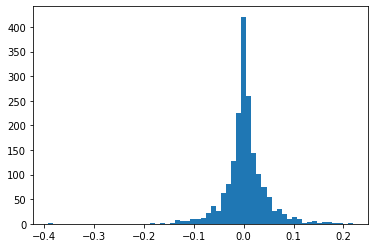

In [ ]:
plt.hist(dfBitcoin.DailyReturn, bins = 60)

In [5]:
def plotFeatures(df, colIndex): # dfBitcoin or dfGold
  fig = go.Figure()
  colors = ['blue', 'red', 'green', 'purple']
  j = 0
  for cols in colIndex:
    line = go.Scatter(x = df.Date, y = df.iloc[:,cols], line = dict(color = colors[j], width = 2), name = df.columns[cols])
    j+=1
    fig.add_traces(line)
    #fig.update_layout( height = 600, width = 1000, showlegend = True)
  fig.show()

In [7]:
plotFeatures(dfBitcoin, [1])

# Plot price movements of bitcoinand gold

In [ ]:
plotFeatures(dfBitcoin, [1])
plotFeatures(dfGold, [1])

# Calculate moving averages and label intersections

In [ ]:

def calculateEMA(df, alpha, ):
  df['EMA' + str(alpha) ] = df.iloc[:, 1].ewm(span = alpha, adjust = False).mean()
def calculateSMA(df, span):
   bit = df.iloc[:, 1]
   df['SMA' +str(span)] = bit.rolling(window=span).mean()
def labelIntersectionPts(df, maName):
  intersectionPts = []
  for ii in range(len(df)-1):
    if (df.Price[ii] > df[maName][ii] and df.Price[ii+1] < df[maName][ii+1]):
      intersectionPts.append(df.Date[ii])
    elif (df.Price[ii] < df[maName][ii] and df.Price[ii+1] > df[maName][ii+1]):
      intersectionPts.append(df.Date[ii])
  intersection = [1 if x in intersectionPts else 0 for x in df.Date]
  df[maName+'Intersection'] = intersection


# Testing each kind of moving averages

In [ ]:

# we buy when intersection = 1 AND price < MA
# sell when intersection = 1 AND price > <A
# When we buy, multiple cash by 0.98
# in between, multiple cash by (1 + dailyReturn) 
# the first time we buy: df.Price < df.SMA10 and df.SMA10Intersection == 1

# add 1 to count every time intersection = 1
# when count is odd, multiply cash by 1 + daily return
# multiply by 0.98^(count -1) because both sell and buy cost commission fee
def testStrat(df, maName, commissionRate, initialValue):
  startDate = ""
  maIntersection = maName+"Intersection"
  #initialValue = 1000
  for ii in range(len(df)):
    if df.Price[ii] < df[maName][ii] and df[maIntersection][ii] == 1:
      startDate = df.Date[ii]
      break
  ii = df.Date[df.Date == startDate].index[0]
  count = 1
  while ii < len(df):

    if df[maIntersection][ii] == 1:
      count += 1

    if count%2 == 0:
      # buy
      initialValue *= (1+df.DailyReturn[ii])
    #print(initialValue)
    ii+=1
  return initialValue*(1 - commissionRate)**(count-1)

#testStrat(dfGold, 'SMA10')

In [ ]:
dfb = dfBitcoin.copy().drop(dfBitcoin.columns[3:], axis = 1)
dfg = dfGold.copy().drop(dfGold.columns[3:], axis = 1)
calculateSMA(dfb, 20)
calculateSMA(dfg, 20)
calculateEMA(dfb, 20)
calculateEMA(dfg, 20)
dfb
plotFeatures(dfb, [1,3,4])
plotFeatures(dfg, [1,3,4])

# In this block, we find that SMA is the best strategy for both gold and bitcoin
# Best window sizes for gold and bitcoin are 62 days and 8 days, respectively

In [ ]:

def findBestSMA(df, commR):
  #df = df.loc[:, 'Date':'DailyReturn']
  whichMAisBest = pd.DataFrame(columns = ['FinalWorth', 'percentReturn'])
  for jj in tqdm (range (1, 300)):
    df = df.loc[:, 'Date':'DailyReturn']
    calculateSMA(df, jj)
    labelIntersectionPts(df, df.columns[3])
    
    try:
      finalValue = testStrat(df, df.columns[3], commR, 1000)
      whichMAisBest.loc[df.columns[3]] = [finalValue, finalValue/1000 - 1]
    except:
     continue

  return whichMAisBest

def findBestEMA(df, commR):
  #df = df.loc[:, 'Date':'DailyReturn']
  whichEMAisBest = pd.DataFrame(columns = ['FinalWorth', 'percentReturn'])
  for jj in tqdm (range(1,300)):
    df = df.loc[:, 'Date':'DailyReturn']
    calculateEMA(df, jj)
    labelIntersectionPts(df, df.columns[3])
    
    try:
      finalValue = testStrat(df, df.columns[3], commR, 1000)
      whichEMAisBest.loc[df.columns[3]] = [finalValue, finalValue/1000 - 1]
    except:
      continue

  return whichEMAisBest


In [ ]:
def plotGeneral(df, colName):
  fig = go.Figure()
  fig.add_traces(go.Scatter(x = df.index, y = df[colName]))
  fig.show()



In [ ]:
emaGold = findBestEMA(dfGold, 0.01)
plotGeneral(emaGold, 'percentReturn')
#fig.save()

100%|██████████| 299/299 [00:23<00:00, 12.97it/s]


In [ ]:
emaGold

,FinalWorth,percentReturn
EMA2,58.089333,-0.941911
EMA3,163.602607,-0.836397
EMA4,332.617210,-0.667383
EMA5,462.593643,-0.537406
EMA6,538.743938,-0.461256
...,...,...
EMA295,1112.664362,0.112664
EMA296,1112.664362,0.112664
EMA297,1112.664362,0.112664
EMA298,1127.785812,0.127786


In [ ]:
emaBitcoin = findBestEMA(dfBitcoin, 0.02)
plotGeneral(emaBitcoin, 'percentReturn')

100%|██████████| 299/299 [00:36<00:00,  8.08it/s]


In [ ]:
emaBitcoin

,FinalWorth,percentReturn
EMA2,1.619328e+03,0.619328
EMA3,1.671080e+05,166.108048
EMA4,1.854484e+06,1853.483665
EMA5,2.015012e+06,2014.011648
EMA6,2.933323e+06,2932.322510
...,...,...
EMA295,2.174097e+05,216.409706
EMA296,2.174097e+05,216.409706
EMA297,2.219556e+05,220.955571
EMA298,2.219556e+05,220.955571


In [ ]:
smaGold = findBestSMA(dfGold, 0.01)
plotGeneral(smaGold, 'percentReturn')
smaGold

100%|██████████| 299/299 [00:25<00:00, 11.72it/s]


,FinalWorth,percentReturn
SMA2,2.313850,-0.997686
SMA3,99.566585,-0.900433
SMA4,368.273518,-0.631726
SMA5,534.740173,-0.465260
SMA6,632.440410,-0.367560
...,...,...
SMA295,1395.560015,0.395560
SMA296,1395.560015,0.395560
SMA297,1395.560015,0.395560
SMA298,1395.560015,0.395560


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
smaBitcoin = findBestSMA(dfBitcoin, 0.02, )
plotGeneral(smaBitcoin, 'percentReturn')
smaBitcoin

100%|██████████| 299/299 [00:32<00:00,  9.23it/s]


,FinalWorth,percentReturn
SMA2,7.124303e-06,-1.000000
SMA3,2.092261e+04,19.922614
SMA4,7.495674e+02,-0.250433
SMA5,5.416906e+06,5415.906142
SMA6,1.135233e+07,11351.329860
...,...,...
SMA295,1.162049e+04,10.620487
SMA296,9.755133e+03,8.755133
SMA297,9.755133e+03,8.755133
SMA298,1.007283e+04,9.072834


In [ ]:
dfBitcoin

NameError: ignored

In [ ]:
# add best smas to dfs
calculateSMA(dfGold, 62)
calculateSMA(dfBitcoin, 8)
labelIntersectionPts(dfGold, "SMA62")
labelIntersectionPts(dfBitcoin, "SMA8")

In [ ]:
dfGold

,Date,Price,DailyReturn,SMA10,SMA20,SMA50,EMA10,EMA20,EMA50,SMA10Intersection,SMA20Intersection,SMA50Intersection,EMA10Intersection,EMA20Intersection,EMA50Intersection,SMA62,SMA62Intersection
0,9/12/16,1324.60,NaN,NaN,NaN,NaN,1324.600000,1324.600000,1324.600000,0,0,0,0,0,0,NaN,0
1,9/13/16,1323.65,-0.000717,NaN,NaN,NaN,1324.427273,1324.509524,1324.562745,0,0,0,0,0,0,NaN,0
2,9/14/16,1321.75,-0.001435,NaN,NaN,NaN,1323.940496,1324.246712,1324.452441,0,0,0,0,0,0,NaN,0
3,9/15/16,1310.80,-0.008284,NaN,NaN,NaN,1321.551315,1322.966073,1323.917052,0,0,0,0,0,0,NaN,0
4,9/16/16,1308.35,-0.001869,NaN,NaN,NaN,1319.151076,1321.574066,1323.306579,0,0,0,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,9/6/21,1821.60,-0.001152,1806.875,1785.8075,1795.759,1807.445492,1799.861094,1800.233500,1,0,0,1,0,0,1800.227419,0
1251,9/7/21,1802.15,-0.010677,1806.890,1788.9725,1796.196,1806.482675,1800.079085,1800.308656,0,1,1,0,1,1,1798.832258,1
1252,9/8/21,1786.00,-0.008962,1804.645,1792.1050,1796.807,1802.758552,1798.738220,1799.747533,0,0,0,0,0,0,1797.299194,0
1253,9/9/21,1788.25,0.001260,1804.600,1794.3375,1797.309,1800.120634,1797.739342,1799.296649,0,0,0,0,0,0,1796.051613,0


# Hows sensitive is the trading strategy to commission fee?

In [ ]:
def testSensitivity(df):
  temp = pd.DataFrame(columns = ['FinalValue'])
  for ii in np.linspace(0,1, 100):
    temp.loc[ii] = testStrat(df, df.columns[3], ii, 1000)
  return temp



In [ ]:
temp = testSensitivity(dfGold)
plotGeneral(temp, 'FinalValue')

In [ ]:
temp = testSensitivity(dfBitcoin)

plotGeneral(temp, 'FinalValue')

In [ ]:
calculateSMA(dfGold, 62)
calculateSMA(dfBitcoin, 8)
labelIntersectionPts(dfGold, 'SMA62')
labelIntersectionPts(dfBitcoin, 'SMA8')

# From above, we observe that our strategy is very sensitivy to commission rate: commision rate vs. return is inverse exponential

# Next step is to try to incoporate both assets into our strategy, not just put everything in one asset.

In [ ]:


weightedReturns = []
for ii in np.linspace(0, 1, 100):
    weights = [ii, 1- ii]
    returns = testStrat(dfGold, 'SMA62', 0.01, weights[0] * 1000) + testStrat(dfBitcoin, 'SMA8', 0.02, weights[1] * 1000)
    weightedReturns.append(returns)

In [ ]:
weightedReturns

In [ ]:
dftest = dfBitcoin.iloc[1000:, :3].reset_index(drop = True)

calculateSMA(dftest, 8)
labelIntersectionPts(dftest, 'SMA8')
dftest
testStrat(dftest, 'SMA8', 0.02, 1000)

40753.47024811056

# Fill in missing dates to dfGold

In [ ]:
def labelSellBuyHold(df, maName):
  startDate = ""
  maIntersection = maName+"Intersection"
  #initialValue = 1000
  for ii in range(len(df)):
    if df.Price[ii] < df[maName][ii] and df[maIntersection][ii] == 1:
      startDate = df.Date[ii]
      break
  jj = df.Date[df.Date == startDate].index[0]

  labels = df[maIntersection].copy()

  count = 0
  for ii in range(jj, len(df[maIntersection])):
    if labels[ii] == 1:
      if count %2 == 0:
        labels[ii] = 'buy'
      else:
        labels[ii] = 'sell'
      count += 1

    else:
      if count%2 == 0:
        labels[ii] = 'cash'

      else:
        labels[ii] = 'hold'

  df['buySell'] = labels

labelSellBuyHold(dfGold, 'SMA62')
for ii in range(len(dfGold.buySell)):
  if dfGold.buySell[ii] == 'sell' and dfGold.buySell[ii + 1] == 'buy' and dfGold.buySell[ii + 2] != 'sell':
    dfGold.buySell[ii] = 'hold'
    dfGold.buySell[ii+1] = 'hold'

  if dfGold.buySell[ii] == 'buy' and dfGold.buySell[ii + 1] == 'sell' and dfGold.buySell[ii + 2] != 'buy':
    dfGold.buySell[ii] = 'cash'
    dfGold.buySell[ii+1] = 'cash' 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
def calcSMAReturn(df, value, commR):
  count = 0
  for ii in range(len(df.buySell)):
    if df.buySell[ii] == 'buy': #or df.buySell == 'sell':
      value *= 1 + df.DailyReturn[ii]
      count += 1
    if df.buySell[ii] == 'sell':
      count += 1

    if df.buySell[ii] == 'hold':
      value *= 1 + df.DailyReturn[ii]

  return value * (1 - commR)** count

calcSMAReturn(dfGold, 1000, 0.01)
#testStrat(dfGold, 'SMA62', 0.01, 1000)


1969.5340979130374

In [ ]:
missingDateList = [x for x in dfBitcoin.Date if x not in dfGold.Date.values]
dfMissingDate = pd.DataFrame(columns = dfGold.columns)
for ii in range(len(missingDateList)):
  dfMissingDate.loc[ii] = [missingDateList[ii], np.nan, np.nan, np.nan, np.nan, np.nan]

dfGoldwithMissingDates = pd.concat([dfGold, dfMissingDate], ignore_index = True)
dfGoldwithMissingDates['Date'] = pd.to_datetime(dfGoldwithMissingDates['Date'])
dfGoldwithMissingDates = dfGoldwithMissingDates.sort_values(by = ['Date']).reset_index(drop = True)
dfGoldwithMissingDates

,Date,Price,DailyReturn,SMA62,SMA62Intersection,buySell
0,2016-09-11,NaN,NaN,NaN,NaN,NaN
1,2016-09-12,1324.60,NaN,NaN,0,0
2,2016-09-13,1323.65,-0.000717,NaN,0,0
3,2016-09-14,1321.75,-0.001435,NaN,0,0
4,2016-09-15,1310.80,-0.008284,NaN,0,0
...,...,...,...,...,...,...
1821,2021-09-06,1821.60,-0.001152,1800.227419,0,hold
1822,2021-09-07,1802.15,-0.010677,1798.832258,1,sell
1823,2021-09-08,1786.00,-0.008962,1797.299194,0,cash
1824,2021-09-09,1788.25,0.001260,1796.051613,0,cash


# It seems like if we simply split 1000 cash into different weights and use their respecitve SMAs does not increase our return compared to putting everything in Bitcoin.
# What we will do now is to put as much money in bitcoin as possible. But when we hold cash from selling bitcoin, we will use it to buy gold. Then if it is time to buy bitcoin, we will sell gold and buy bitcoin.

In [ ]:
mergedDf = pd.DataFrame(columns = ['Date','goldPrice', 'goldR','bitcoinPrice', 'bitcoinR', 'goldIntersection', 'bitcoinIntersection'])
mergedDf['Date'] = dfGoldwithMissingDates.Date
mergedDf['goldPrice'] = dfGoldwithMissingDates.Price
mergedDf['goldR'] = dfGoldwithMissingDates.DailyReturn
mergedDf['bitcoinIntersection'] = dfBitcoin.SMA8Intersection
mergedDf['goldIntersection'] = dfGoldwithMissingDates.SMA62Intersection
mergedDf['bitcoinPrice'] = dfBitcoin.Price
mergedDf['bitcoinR'] = dfBitcoin.DailyReturn

mergedDf

,Date,goldPrice,goldR,bitcoinPrice,bitcoinR,goldIntersection,bitcoinIntersection
0,2016-09-11,NaN,NaN,621.65,NaN,NaN,0
1,2016-09-12,1324.60,NaN,609.67,-0.019271,0,0
2,2016-09-13,1323.65,-0.000717,610.92,0.002050,0,0
3,2016-09-14,1321.75,-0.001435,608.82,-0.003437,0,0
4,2016-09-15,1310.80,-0.008284,610.38,0.002562,0,0
...,...,...,...,...,...,...,...
1821,2021-09-06,1821.60,-0.001152,51769.06,0.036472,0,0
1822,2021-09-07,1802.15,-0.010677,52677.40,0.017546,1,1
1823,2021-09-08,1786.00,-0.008962,46809.17,-0.111399,0,0
1824,2021-09-09,1788.25,0.001260,46078.38,-0.015612,0,0


In [ ]:

labelSellBuyHold(dfBitcoin, 'SMA8' )
mergedDf['BitHoldOrCash'] = dfBitcoin.buySell

mergedDf['GoldHoldOrCash'] = dfGoldwithMissingDates.buySell
mergedDf

,Date,goldPrice,goldR,bitcoinPrice,bitcoinR,goldIntersection,bitcoinIntersection,BitHoldOrCash,GoldHoldOrCash
0,2016-09-11,NaN,NaN,621.65,NaN,NaN,0,0,NaN
1,2016-09-12,1324.60,NaN,609.67,-0.019271,0,0,0,0
2,2016-09-13,1323.65,-0.000717,610.92,0.002050,0,0,0,0
3,2016-09-14,1321.75,-0.001435,608.82,-0.003437,0,0,0,0
4,2016-09-15,1310.80,-0.008284,610.38,0.002562,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1821,2021-09-06,1821.60,-0.001152,51769.06,0.036472,0,0,hold,hold
1822,2021-09-07,1802.15,-0.010677,52677.40,0.017546,1,1,sell,sell
1823,2021-09-08,1786.00,-0.008962,46809.17,-0.111399,0,0,cash,cash
1824,2021-09-09,1788.25,0.001260,46078.38,-0.015612,0,0,cash,cash


In [ ]:
dfb = mergedDf.BitHoldOrCash
dfg = mergedDf.GoldHoldOrCash
mergedDf['goldBuy'] = np.nan
for ii in range(len(dfb)):
  if (dfb[ii] == 'cash' or dfb[ii] == 'sell') and (dfg[ii] == 'hold' or dfg[ii] == 'buy'):
    mergedDf['goldBuy'][ii] = 'hold'
#dfBitcoin
mergedDf

NameError: ignored

In [ ]:
testStrat(dfGold, 'SMA62', 0.01, 1000)

1683.9445371147517